# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Data set selected for the analysis is ''TMDb movie data''.

##### Question1) How are runtimes, popularity and revenues changing over period of years('release_year')?
###### Additional Question:
###### a.)What are famous runtimes or max runtimes, revenues and popularity values over the years?
    
##### Question2) What kinds of properties are associated with movies that have high revenues?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.htmlimport pandas as pd
import pandas as pd
import csv
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [26]:
#Load data from CSV file
df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [30]:
#checking for duplicacy
df.duplicated()
sum(df.duplicated())

1

In [31]:
#removing the duplicate records
df.drop_duplicates(inplace=True)

In [32]:
#rechecking for duplicacy
sum(df.duplicated())

0

In [33]:
#checking for null records
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [34]:
#So from the above data only imdb_id is having null values which is having relevance for us as its a uniqueid.
#We will drop these records from dataset for further analysis.
df.dropna(subset=['imdb_id'], inplace=True)

In [35]:
#Rechecking for null records
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [36]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
mean,65959.191617,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,5.973865,2001.313128,1.756606e+07,5.141632e+07
std,92018.246342,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,0.934604,12.815672,3.431919e+07,1.446965e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10591.500000,0.207733,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20618.000000,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75393.500000,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.374346e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### From Column 'revenue' and  'budget' all the records which are zero have been dropped because 50%(can be seen from above describe function) of data was zero in these colmns.

##### And these columns where not updated with most frequent values because 'revenue' and  'budget'  of each movies is different, it can't  be same for 50% of the data.So it would have been adversely affected our analysis.

##### So it was fair to drop all those zero records for analysis.

In [38]:
#Removing the zero records from coloumn revenue,budget(which is our point intrest)
df = df[df.revenue != 0]
df = df[df.budget != 0]

In [39]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [43]:
df.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395427 

In [40]:
#And we will save this dataset for futher use.
df.to_csv('tmdb-movies-clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


#### Research Question 1- How are runtimes, popularity and revenues changing over period of years?
                       *For the analysis to start we would be grouping, variable 'release_year' so that we could all                              the movies collaborated together released in a particular year.
                       *Then we would be using histograms to visualise the variables budget, runtimes, popularity & revenues                    against release_year.

In [41]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
# Importing the dataset

df1 = pd.read_csv('tmdb-movies-clean.csv',encoding='ISO-8859-1')

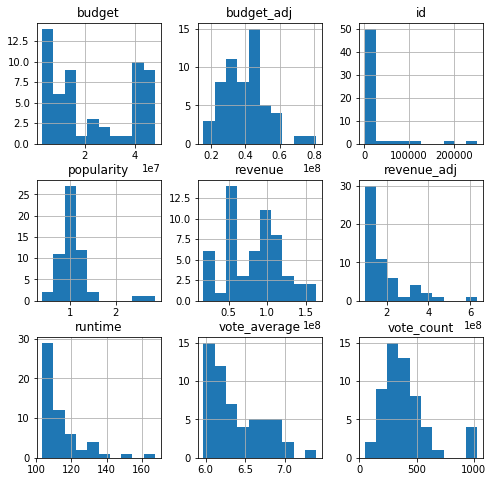

In [16]:
#grouping the variable 'release_year' and calculating the mean values
df_rel_yr = df1.groupby('release_year').mean()
#to see initial explorations
df_rel_yr.hist(figsize=(8,8));

### For 'Runtime' Variable :

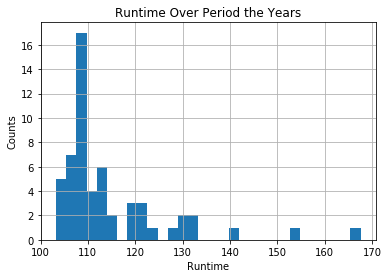

In [17]:
df_rel_yr['runtime'].hist(bins=30)
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime Over Period the Years');

In [51]:
#checking with the describe function
df_rel_yr['runtime'].describe()

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

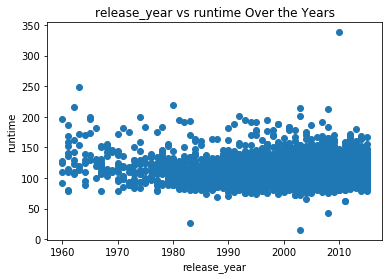

In [18]:
plt.scatter(x=df1['release_year'], y=df1['runtime'])
plt.xlabel('release_year')
plt.ylabel('runtime')
plt.title('release_year vs runtime Over the Years');

### Observations Regarding 'Runtime'


From the plots and histogram, we can see that:

1.As from the plots and describe function we could se that popular runtimes are between 106 to 107 minutes.

2.It is right skewed.

3.Max runtime was of 124.34 minutes

4.As seen from scatter plot there is no correlation between Runtime and Release Year.

### For 'Popularity' Variable:

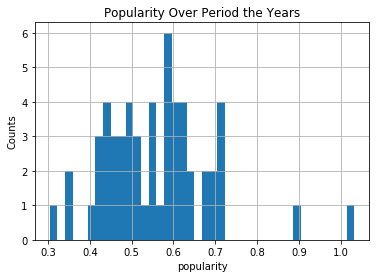

In [55]:
df_rel_yr['popularity'].hist(bins=40)
plt.xlabel('popularity')
plt.ylabel('Counts')
plt.title('Popularity Over Period the Years');

In [56]:
#checking with the describe function
df_rel_yr['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

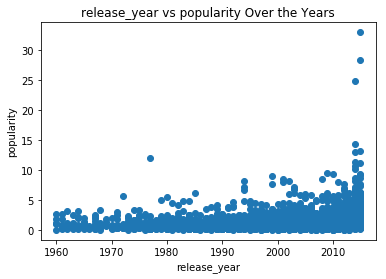

In [19]:
plt.scatter(x=df1['release_year'], y=df1['popularity'])
plt.xlabel('release_year')
plt.ylabel('popularity')
plt.title('release_year vs popularity Over the Years');

### Observations Regarding 'Popularity'

From the plots and histogram, we can see that:

1.The distribution is skewed to right.

2.Maximum ratings received fall in the 0.45 to 0.62 ranges.

3.There is a positive correlation between 'popularity' & 'release_year'.

### For 'Revenue' Variable:

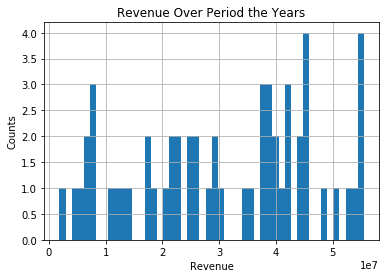

In [63]:
df_rel_yr['revenue'].hist(bins=50)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Over Period the Years');

In [64]:
#checking with the describe function
df_rel_yr['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

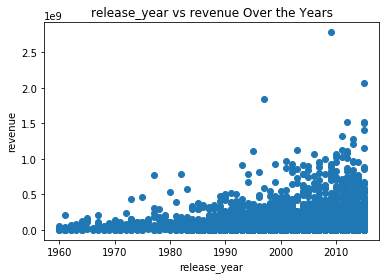

In [20]:
plt.scatter(x=df1['release_year'], y=df1['revenue'])
plt.xlabel('release_year')
plt.ylabel('revenue')
plt.title('release_year vs revenue Over the Years');

### Observations Regarding 'Revenue'

From the plots and histogram, we can see that:

1.Distribution is right skewed.

2.Revenues vary widely.

3.Most movie revenues fall in the 3.7e+07 to 4.5e+07 ranges.

4.There is a positive correlation between 'Revenue' &  'release_year'.

#### Research Question 2- What kinds of properties are associated with movies that have high revenues?

1.We will find the corelation between variables which are influencing revenue using ''Pearson : standard correlation coefficient''

2.And after that we would be using scatter plots to visualize tha data set:

a.Revenue vs Popularity
   b.Revenue vs Vote counts
     c.Revenue vs Vote averages


In [65]:
#using ''Pearson : standard correlation coefficient''
df_rel_yr.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


From the above correlation we could see that,

1.'vote_count' and 'popularity' are correlated positively wrt revenue.

2.'vote_average' is correlated negatively wrt revenue.

### Revenue vs Popularity

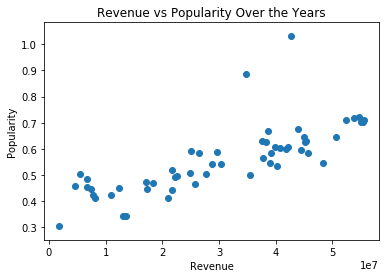

In [70]:
#scatterplot of revenue and popularity
plt.scatter(x=df_rel_yr['revenue'], y=df_rel_yr['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

### Observations- Revenue vs Popularity:

1.The correlation computed from function is similar to the scatterplot.

2.Popularity is proportional to revenues.

### Revenue vs Vote counts

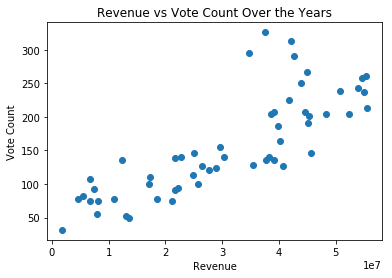

In [72]:
#scatterplot of revenue and vote counts over the years
plt.scatter(x=df_rel_yr['revenue'], y=df_rel_yr['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count Over the Years');

### Observations- Revenue vs Vote Count:

1.The correlation computed from function is similar to the scatterplot.

2.Vote count is almost proportional to revenues.


### Revenue vs Vote averages

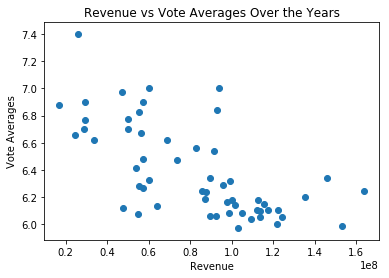

In [112]:
# scatterplot of revenue and vote averages over the years
plt.scatter(x=df_rel_yr['revenue'], y=df_rel_yr['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');

### Observations- Revenue vs Vote Average:

1.The correlation computed from function is similar to the scatterplot.

2.Vote averages are inversely proportional to revenues.

3.Seeing this plot and the previous, we can say voting variables as influencing revenues.

## Limitations

1.There was one duplicate value which was removed.

2.Null values were also present.

3.For column 'budget' and 'revenue' all the rows with zero record were dropped for analysis.Almost 50% of data were having zero records.

4.After all these alterations aor dataset decreased from 10886 rows to 3854 rows.

<a id='conclusions'></a>
## Conclusions

#### Question 1

1.From the analysis, we got to know that there are patterns to runtimes, popularity and revenues.

2.We found that popular runtimes ranges between 106 and 107 minutes.

3.Also, ratings had maximum likelihood of being in the 0.45 to 0.62 range.

4.Revenues showed a wider range, but the most likely it was falling in the range of 3.7e+07 to 4.5e+07.

5.Over the period of years Popularity and Revenue has increased gradually (can be seen from scatter plots).But runtime is having no correlation with release years. 

#### Question 2

1.Based on the analysis, we found that over the years, popularity and revenue show a direct relation.

2.Vote counts and revenue are related positively while vote averages are inversely related to revenues.

So Popularity and Vote count are properties that are associated with movies that have high revenues.

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295